## Import libraries, read in data and see what data looks like

In [2]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Data science
import pandas as pd
import numpy as np

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold

# Geospatial
import contextily as cx
import xarray as xr
import zarr # Not referenced, but required for xarray

# Import Planetary Computer tools
import fsspec
import pystac

# Other
import os
import zipfile
from itertools import cycle
# import geopandas

In [3]:
df = pd.read_csv("6_primaries.csv")
df = df.drop(['country','continent','stateProvince'], 1)

In [4]:
df

,Unnamed: 0,gbifID,eventDate,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,0,3463704693,2019-11-10 00:00:00,-33.466600,150.185000,Crinia Signifera,0,0,73.350000,197.01666,17.966670,7.081669,0.991667,3.368333
1,1,3463455363,2018-10-08 00:00:00,-33.833166,151.014700,Crinia Signifera,0,1,70.383330,194.25000,24.088335,13.050002,1.398333,4.023333
2,2,3463662977,2018-11-04 00:00:00,-33.714100,151.143000,Crinia Signifera,0,2,96.600000,194.60000,23.010002,12.643335,1.372833,3.655000
3,3,2806506373,2016-07-15 00:00:00,-33.907400,150.833720,Crinia Signifera,0,3,63.183334,197.13333,24.073334,11.728335,1.328000,3.355000
4,4,3463505407,2018-12-21 00:00:00,-33.759766,151.113259,Crinia Signifera,0,4,84.050000,194.86667,23.581669,13.054999,1.394667,3.798333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,5575,1452535203,2015-12-07 00:00:00,-33.839939,151.065573,Litoria Fallax,1,5575,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5576,5576,2421382752,2019-02-15 00:00:00,-33.838575,151.071142,Litoria Fallax,1,5576,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5577,5577,3108915921,2017-11-12 00:00:00,-33.699966,151.043100,Litoria Fallax,1,5577,85.166664,195.68333,23.146670,12.186667,1.352667,3.651667
5578,5578,3108900314,2019-10-30 00:00:00,-33.789908,151.131394,Litoria Fallax,1,5578,90.416664,194.50000,23.373333,13.133334,1.400833,3.763333


In [5]:
# CS is all absence data, LF is all presence data, each has 2790 observations
df[df['species'] =='Crinia Signifera'].groupby(by='occurrenceStatus').count()
df[df['species'] =='Litoria Fallax'].groupby(by='occurrenceStatus').count()

,Unnamed: 0,gbifID,eventDate,decimalLatitude,decimalLongitude,species,key,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
occurrenceStatus,,,,,,,,,,,,,
1,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790,2790


In [6]:
df = df.drop(['Unnamed: 0','gbifID','eventDate','species','key',],1)

In [7]:
df

,decimalLatitude,decimalLongitude,occurrenceStatus,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,-33.466600,150.185000,0,73.350000,197.01666,17.966670,7.081669,0.991667,3.368333
1,-33.833166,151.014700,0,70.383330,194.25000,24.088335,13.050002,1.398333,4.023333
2,-33.714100,151.143000,0,96.600000,194.60000,23.010002,12.643335,1.372833,3.655000
3,-33.907400,150.833720,0,63.183334,197.13333,24.073334,11.728335,1.328000,3.355000
4,-33.759766,151.113259,0,84.050000,194.86667,23.581669,13.054999,1.394667,3.798333
...,...,...,...,...,...,...,...,...,...
5575,-33.839939,151.065573,1,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5576,-33.838575,151.071142,1,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5577,-33.699966,151.043100,1,85.166664,195.68333,23.146670,12.186667,1.352667,3.651667
5578,-33.789908,151.131394,1,90.416664,194.50000,23.373333,13.133334,1.400833,3.763333


## Explore 6 primary vars, continuous vs. categorical 
## take 1: group by

1. see the dfrequency istribution of the 6 xs
![index_demo](histogram.png)

In [21]:
#2. normalize everything
from sklearn import preprocessing
x_data = ['ppt_mean','srad_mean','tmax_mean','tmin_mean','vap_mean','ws_mean']
for xi in (x_data):
    new_name = "normalized_" + xi
    new_col = preprocessing.normalize([df[xi]]).T
    df[new_name] = new_col
df2 = df.drop(['ppt_mean','srad_mean','tmax_mean','tmin_mean','vap_mean','ws_mean'],1)
df2.head()

,decimalLatitude,decimalLongitude,occurrenceStatus,normalized_ppt_mean,normalized_srad_mean,normalized_tmax_mean,normalized_tmin_mean,normalized_vap_mean,normalized_ws_mean
0,-33.466600,150.185000,0,0.013023,0.013477,0.010380,0.008058,0.010088,0.012405
1,-33.833166,151.014700,0,0.012496,0.013287,0.013917,0.014849,0.014225,0.014817
2,-33.714100,151.143000,0,0.017151,0.013311,0.013294,0.014386,0.013966,0.013461
3,-33.907400,150.833720,0,0.011218,0.013485,0.013908,0.013345,0.013509,0.012356
4,-33.759766,151.113259,0,0.014923,0.013330,0.013624,0.014854,0.014188,0.013989


In [22]:
#df2.to_csv('6_primaries_normalized.csv')

**A simple approach could be to group the continuous variable using the categorical variable, measure the variance in each group and comparing it to the overall variance of the continuous variable. If the variance after grouping falls down significantly, it means that the categorical variable can explain most of the variance of the continuous variable and so the two variables likely have a strong association.**

In [23]:
for xi in df2.columns[3:]:
    print(xi,"\n",
          "variance without grouping: ", df2[xi].var(),'\n',
          "variance after grouping by presence: ", df2[df2['occurrenceStatus']==1][xi].var(),'\n',
          "variance after grouping by absence: ", df2[df2['occurrenceStatus']==0][xi].var() ,
          "\n")

normalized_ppt_mean 
 variance without grouping:  2.79715617896237e-06 
 variance after grouping by presence:  1.9546833179597815e-06 
 variance after grouping by absence:  3.453144359575519e-06 

normalized_srad_mean 
 variance without grouping:  2.000103141834957e-08 
 variance after grouping by presence:  2.3870801872263764e-08 
 variance after grouping by absence:  1.3120190918406364e-08 

normalized_tmax_mean 
 variance without grouping:  1.0659123307446113e-06 
 variance after grouping by presence:  1.0746020237273847e-07 
 variance after grouping by absence:  1.695516455595448e-06 

normalized_tmin_mean 
 variance without grouping:  4.3463213328971876e-06 
 variance after grouping by presence:  1.5023362972960446e-06 
 variance after grouping by absence:  5.768081961039442e-06 

normalized_vap_mean 
 variance without grouping:  1.5547912471859619e-06 
 variance after grouping by presence:  4.29462824860155e-07 
 variance after grouping by absence:  2.176366355628875e-06 

normal

**Diff sum of #frogs at quartiles of x1-x6**

四等分& 五等分

In [135]:
quartile = []
for xi in df2.columns[3:]:
    q1 = df2.sort_values(by= xi)["occurrenceStatus"][0:1395].sum()
    q2 = df2.sort_values(by= xi)["occurrenceStatus"][1395:2790].sum()
    q3 = df2.sort_values(by= xi)["occurrenceStatus"][2790:4185].sum()
    q4 = df2.sort_values(by= xi)["occurrenceStatus"][4185:5580].sum()
    row = [q1,q2,q3,q4]
    quartile.append(row)
qdf = pd.DataFrame(np.asarray(quartile).T)
qdf.columns = df2.columns[3:]
qdf

,normalized_ppt_mean,normalized_srad_mean,normalized_tmax_mean,normalized_tmin_mean,normalized_vap_mean,normalized_ws_mean
0,678,1119,264,380,380,612
1,833,650,638,680,637,438
2,855,284,1137,588,631,611
3,424,737,751,1142,1142,1129


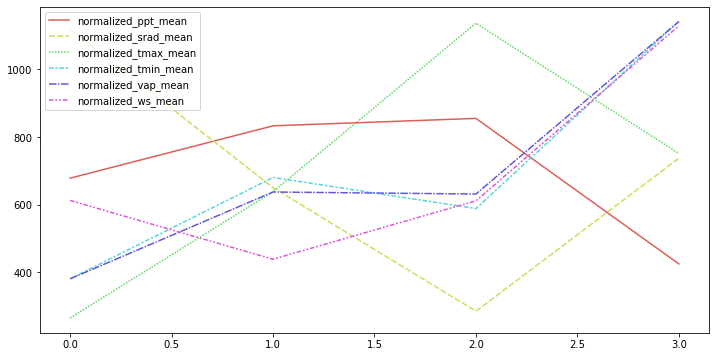

In [167]:
palette = sns.color_palette("hls", 6)
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,6
plt1 = sns.lineplot(data = qdf,legend = 'full', palette = palette)
sns.move_legend(plt1,loc = 'upper left')

In [148]:
quintessential  = []
for xi in df2.columns[3:]:
    q1 = df2.sort_values(by= xi)["occurrenceStatus"][0:1116].sum()
    q2 = df2.sort_values(by= xi)["occurrenceStatus"][1116:2232].sum()
    q3 = df2.sort_values(by= xi)["occurrenceStatus"][2232:3348].sum()
    q4 = df2.sort_values(by= xi)["occurrenceStatus"][3348:4464].sum()
    q5 = df2.sort_values(by= xi)["occurrenceStatus"][4464:5580].sum()
    row = [q1,q2,q3,q4,q5]
    quintessential.append(row)
q5df = pd.DataFrame(np.asarray(quintessential).T)
q5df.columns = df2.columns[3:]
q5df

,normalized_ppt_mean,normalized_srad_mean,normalized_tmax_mean,normalized_tmin_mean,normalized_vap_mean,normalized_ws_mean
0,556,950,143,158,184,528
1,517,573,433,600,597,312
2,917,432,764,494,486,432
3,498,217,914,620,617,568
4,302,618,536,918,906,950


<AxesSubplot:>

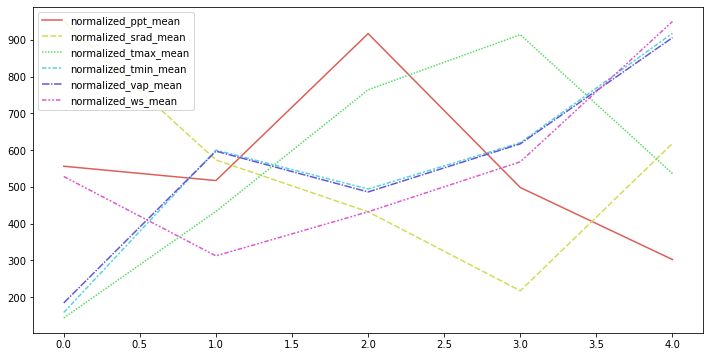

In [170]:
sns.lineplot(data = q5df,legend = 'full', palette = palette)

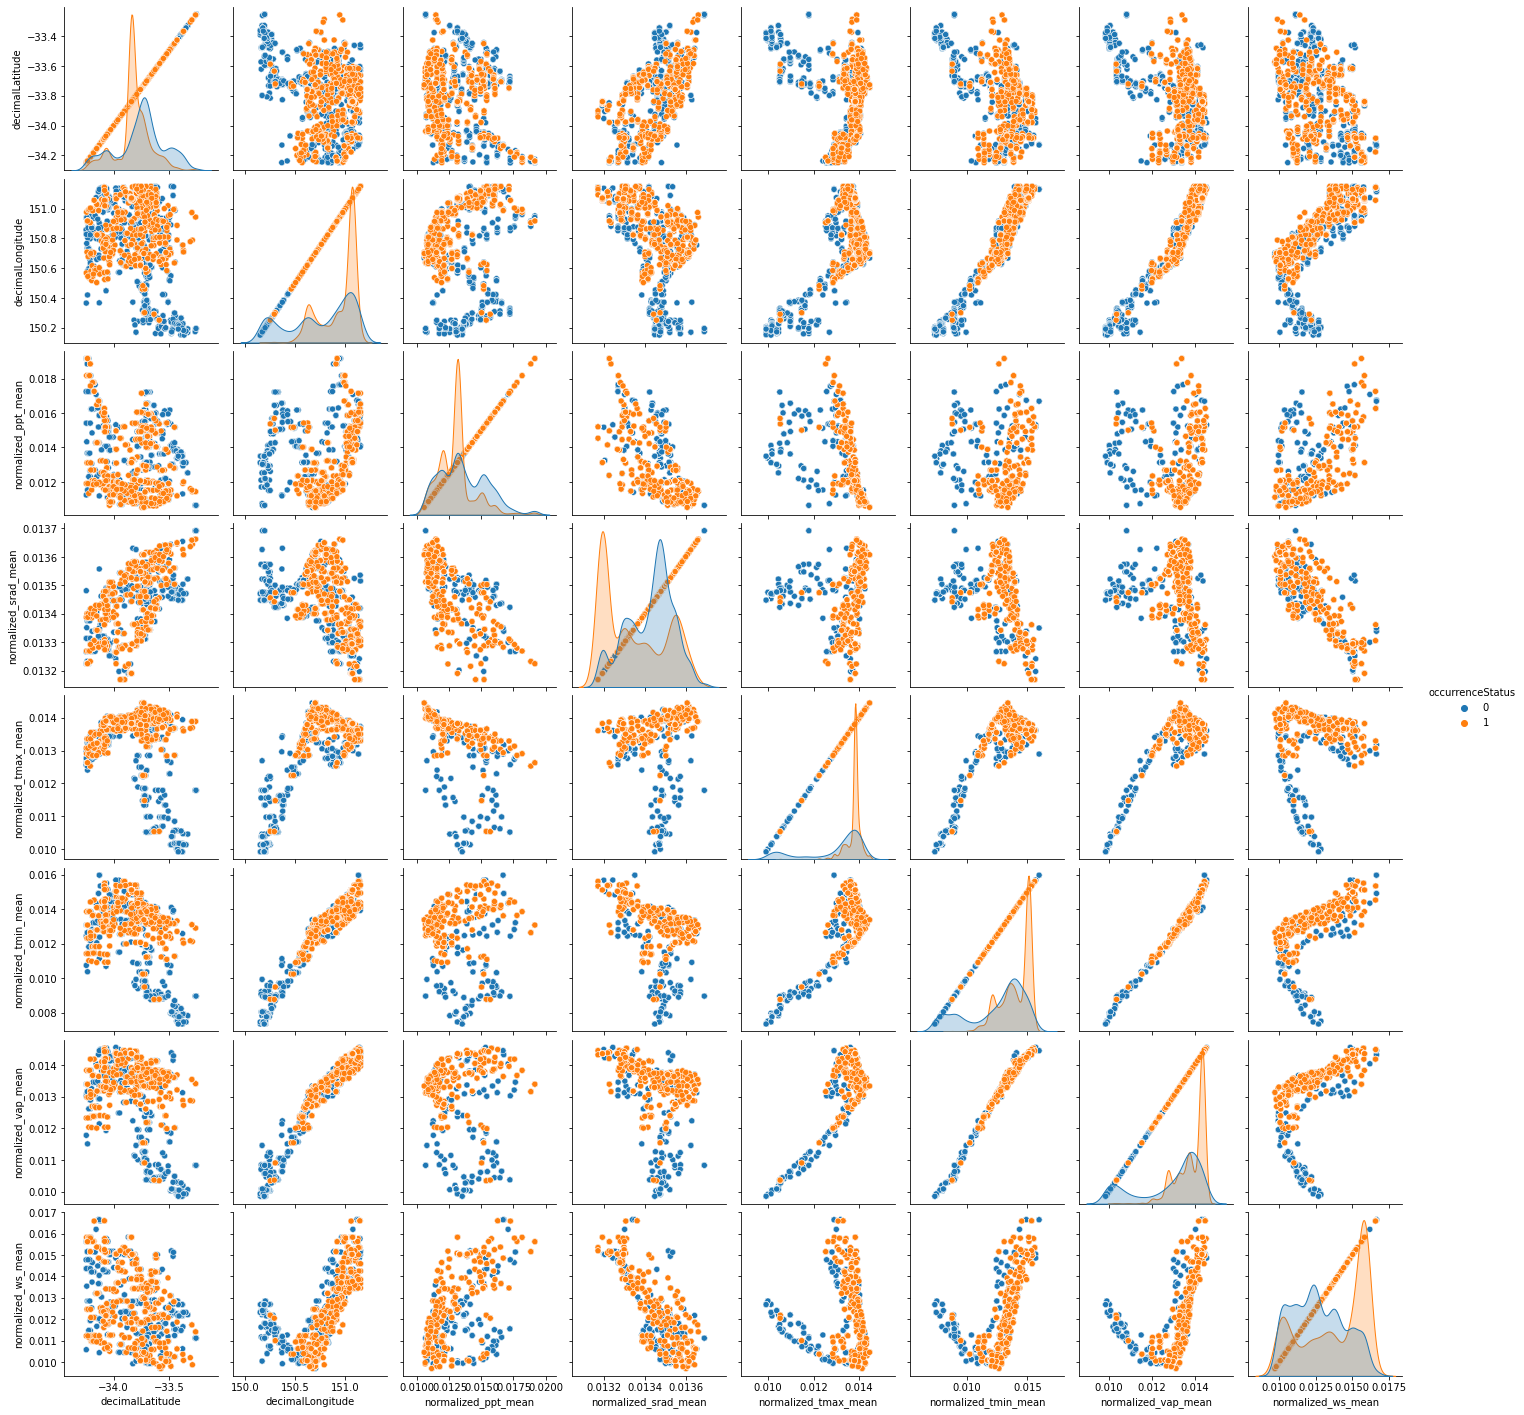

In [18]:
g = sns.pairplot(data = df2, hue = "occurrenceStatus")

<AxesSubplot:xlabel='decimalLatitude', ylabel='Count'>

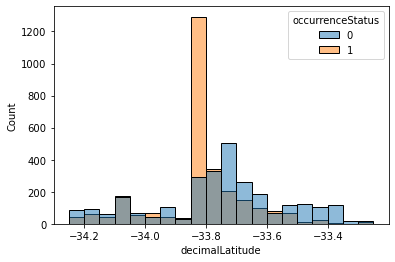

In [17]:
sns.histplot(data=df2, x="decimalLatitude",bins = 20,hue = 'occurrenceStatus')

<AxesSubplot:xlabel='decimalLongitude', ylabel='Count'>

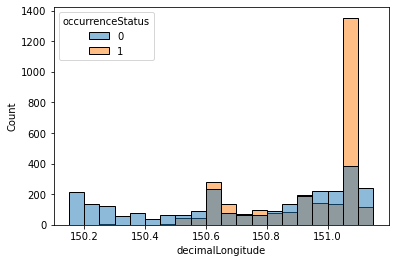

In [19]:
sns.histplot(data=df2, x="decimalLongitude",bins = 20,hue = 'occurrenceStatus')

# 1. Try do LR on 6 vars, normalized

In [ ]:
df = ('6_primaries_normalized.csv')

In [150]:
df2.head()

,occurrenceStatus,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,0,73.350000,197.01666,17.966670,7.081669,0.991667,3.368333
1,0,70.383330,194.25000,24.088335,13.050002,1.398333,4.023333
2,0,96.600000,194.60000,23.010002,12.643335,1.372833,3.655000
3,0,63.183334,197.13333,24.073334,11.728335,1.328000,3.355000
4,0,84.050000,194.86667,23.581669,13.054999,1.394667,3.798333


In [158]:
full_model = LogisticRegression()
# Separate the predictor variables from the response
X = df2.drop(['occurrenceStatus'], 1)
#X_test = df2.drop(['occurrenceStatus','decimalLatitude', 'decimalLongitude'], 1)[4464:]
y = df2.occurrenceStatus.astype(int)
#y_test = df2.occurrenceStatus.astype(int)[:4464]
# Fit model
full_model.fit(X, y)

LogisticRegression()

In [152]:
X

,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,73.350000,197.01666,17.966670,7.081669,0.991667,3.368333
1,70.383330,194.25000,24.088335,13.050002,1.398333,4.023333
2,96.600000,194.60000,23.010002,12.643335,1.372833,3.655000
3,63.183334,197.13333,24.073334,11.728335,1.328000,3.355000
4,84.050000,194.86667,23.581669,13.054999,1.394667,3.798333
...,...,...,...,...,...,...
5575,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5576,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5577,85.166664,195.68333,23.146670,12.186667,1.352667,3.651667
5578,90.416664,194.50000,23.373333,13.133334,1.400833,3.763333


In [157]:
predictions = full_model.predict(X)

In [139]:
# a K-fold shuffle test with normalizing
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
# prepare the cross-validation procedure
cv = KFold(n_splits=1000, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.666 (0.196)


In [140]:
print(f"F1 Score: {np.mean(f1_score(y, predictions))}")
print(f"Accuracy: {np.mean(accuracy_score(y, predictions))}")

F1 Score: 0.675039246467818
Accuracy: 0.6661290322580645


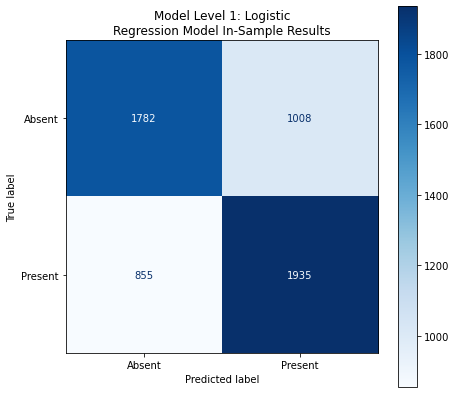

In [34]:
disp = ConfusionMatrixDisplay.from_estimator(full_model, X, y, display_labels=['Absent', 'Present'], cmap='Blues')
disp.figure_.set_size_inches((7, 7))
disp.ax_.set_title('Model Level 1: Logistic\nRegression Model In-Sample Results')
plt.show()

## try to test with other area

In [141]:
df_test = pd.read_csv('presence_only_data.csv')
df_test.head()

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,9148,2236299662,2018-02-13 23:02:00,Australia,Australia,New South Wales,-31.732415,152.088515,Litoria Fallax,1,9148,91.600000,95.583336,23.356667,10.981668,1.253167,2.875000
1,9149,2563750401,2017-10-25 21:07:00,Australia,Australia,New South Wales,-32.968624,151.644194,Litoria Fallax,1,9149,84.133330,73.650000,23.895000,13.938335,1.473000,4.123334
2,9150,1850994254,2017-11-30 08:35:00,Australia,Australia,New South Wales,-33.093048,151.416300,Litoria Fallax,1,9150,80.916664,60.000000,23.413336,12.563334,1.387667,3.541667
3,9151,2446170390,2017-01-01 00:00:00,Australia,Australia,New South Wales,-32.839690,151.701870,Litoria Fallax,1,9151,78.250000,76.550000,23.971668,13.478334,1.466333,3.885000
4,9152,2446280067,2018-01-22 00:00:00,Australia,Australia,New South Wales,-33.086880,151.420570,Litoria Fallax,1,9152,81.216670,61.833332,23.756670,13.061667,1.433333,3.653333


In [142]:
df_test.shape

(9148, 17)

In [143]:
df_test = df_test.drop(['country','continent','stateProvince','Unnamed: 0','gbifID','eventDate','species','key'],1)

In [144]:
df_test = df_test.dropna()

In [145]:
df_test.head()

,decimalLatitude,decimalLongitude,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,-31.732415,152.088515,1,91.600000,95.583336,23.356667,10.981668,1.253167,2.875000
1,-32.968624,151.644194,1,84.133330,73.650000,23.895000,13.938335,1.473000,4.123334
2,-33.093048,151.416300,1,80.916664,60.000000,23.413336,12.563334,1.387667,3.541667
3,-32.839690,151.701870,1,78.250000,76.550000,23.971668,13.478334,1.466333,3.885000
4,-33.086880,151.420570,1,81.216670,61.833332,23.756670,13.061667,1.433333,3.653333


In [146]:
X_test = df_test.drop(['decimalLatitude','decimalLongitude','occurrenceStatus'],1)

In [159]:
predictions = full_model.predict(X_test)

In [160]:
print(f"F1 Score: {np.mean(f1_score(df_test['occurrenceStatus'], predictions))}")
print(f"Accuracy: {np.mean(accuracy_score(df_test['occurrenceStatus'], predictions))}")

F1 Score: 1.0
Accuracy: 1.0


# 2. Try do LR on 6 vars, with everything but vaporization normalized

In [64]:
# what is the range of the 6 vars? 
df3 = pd.read_csv("6_primaries.csv")
df3 = df3[['occurrenceStatus','ppt_mean','srad_mean','tmax_mean','tmin_mean','vap_mean','ws_mean']]
df3

,occurrenceStatus,ppt_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,ws_mean
0,0,73.350000,197.01666,17.966670,7.081669,0.991667,3.368333
1,0,70.383330,194.25000,24.088335,13.050002,1.398333,4.023333
2,0,96.600000,194.60000,23.010002,12.643335,1.372833,3.655000
3,0,63.183334,197.13333,24.073334,11.728335,1.328000,3.355000
4,0,84.050000,194.86667,23.581669,13.054999,1.394667,3.798333
...,...,...,...,...,...,...,...
5575,1,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5576,1,73.933334,192.83333,23.933336,13.291668,1.412000,4.300000
5577,1,85.166664,195.68333,23.146670,12.186667,1.352667,3.651667
5578,1,90.416664,194.50000,23.373333,13.133334,1.400833,3.763333


In [65]:
x_data = ['ppt_mean','srad_mean','tmax_mean','tmin_mean','ws_mean']
for xi in (x_data):
    new_name = "normalized_" + xi
    new_col = preprocessing.normalize([df[xi]]).T
    df3[new_name] = new_col
df3 = df3.drop(['ppt_mean','srad_mean','tmax_mean','tmin_mean','ws_mean'],1)
df3.head()

,occurrenceStatus,vap_mean,normalized_ppt_mean,normalized_srad_mean,normalized_tmax_mean,normalized_tmin_mean,normalized_ws_mean
0,0,0.991667,0.013023,0.013477,0.010380,0.008058,0.012405
1,0,1.398333,0.012496,0.013287,0.013917,0.014849,0.014817
2,0,1.372833,0.017151,0.013311,0.013294,0.014386,0.013461
3,0,1.328000,0.011218,0.013485,0.013908,0.013345,0.012356
4,0,1.394667,0.014923,0.013330,0.013624,0.014854,0.013989


In [67]:
full_model2 = LogisticRegression()
# Separate the predictor variables from the response
X2 = df3.drop(['occurrenceStatus'], 1)
y2 = df2.occurrenceStatus.astype(int)
#y_test = df2.occurrenceStatus.astype(int)[:4464]
# Fit model
full_model2.fit(X2, y2)

LogisticRegression()

In [69]:
predictions2 = full_model2.predict(X2)

In [70]:
# a K-fold shuffle test without normalizing
# prepare the cross-validation procedure
cv2 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(full_model2, X2, y2, scoring='accuracy', cv=cv2, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(f"F1 Score: {np.mean(f1_score(y2, predictions2))}")
print(f"Accuracy: {np.mean(accuracy_score(y2, predictions2))}")

Accuracy: 0.619 (0.017)
F1 Score: 0.6620997291699856
Accuracy: 0.6198924731182796


# 3. Try do LR on 11 vars

In [107]:
df4 = pd.read_csv("model_data_11vars.csv")
df4 = df4.drop(['gbifID', 'eventDate', 'decimalLatitude', 'decimalLongitude', 'species',
       'country', 'continent', 'stateProvince', 'key','Unnamed: 0'], 1)
df4.head()

,occurrenceStatus,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
0,0,65.416667,30.816667,96.100000,73.350000,8.516667,197.016667,17.966668,7.081668,0.991667,0.536000,3.368333
1,0,65.800000,55.366667,121.150000,70.383333,4.816667,194.250000,24.088335,13.050002,1.398333,0.799000,4.023333
2,0,81.516667,31.250000,112.666667,96.600000,15.433333,194.600000,23.010001,12.643334,1.372833,0.704833,3.655000
3,0,59.983333,56.933333,116.833333,63.183333,3.366667,197.133333,24.073335,11.728335,1.328000,0.816500,3.355000
4,0,75.150000,41.800000,116.916667,84.050000,9.116667,194.866667,23.581668,13.055002,1.394667,0.756167,3.798333


In [108]:
# do a little EDA on the 5 new vars
df4.describe()

,occurrenceStatus,aet_mean,def_mean,pet_mean,ppt_mean,q_mean,srad_mean,tmax_mean,tmin_mean,vap_mean,vpd_mean,ws_mean
count,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000,5580.000000
mean,0.500000,67.925857,46.217360,114.093390,74.810591,7.185717,195.694358,23.101748,11.621844,1.310241,0.752656,3.591389
std,0.500045,6.162993,10.235851,7.662695,9.420066,3.834580,2.067500,1.786972,1.832244,0.122573,0.092084,0.561405
min,0.000000,56.250000,18.383333,92.533333,59.283333,3.033333,192.516667,17.160002,6.461668,0.969000,0.487333,2.633333
25%,0.000000,63.416667,38.833333,111.000000,67.966667,4.800000,194.050000,23.015001,10.835002,1.267833,0.716833,3.083333
50%,0.500000,68.500000,50.250000,116.350000,73.933333,5.583333,195.900000,23.875001,12.168335,1.351833,0.780833,3.601667
75%,1.000000,71.250000,53.233333,120.250000,79.516667,9.116667,197.433333,23.933335,13.185002,1.410000,0.813500,4.141667
max,1.000000,86.766667,61.250000,121.683333,107.950000,22.533333,200.166667,25.020002,14.045002,1.431500,0.936333,4.523333


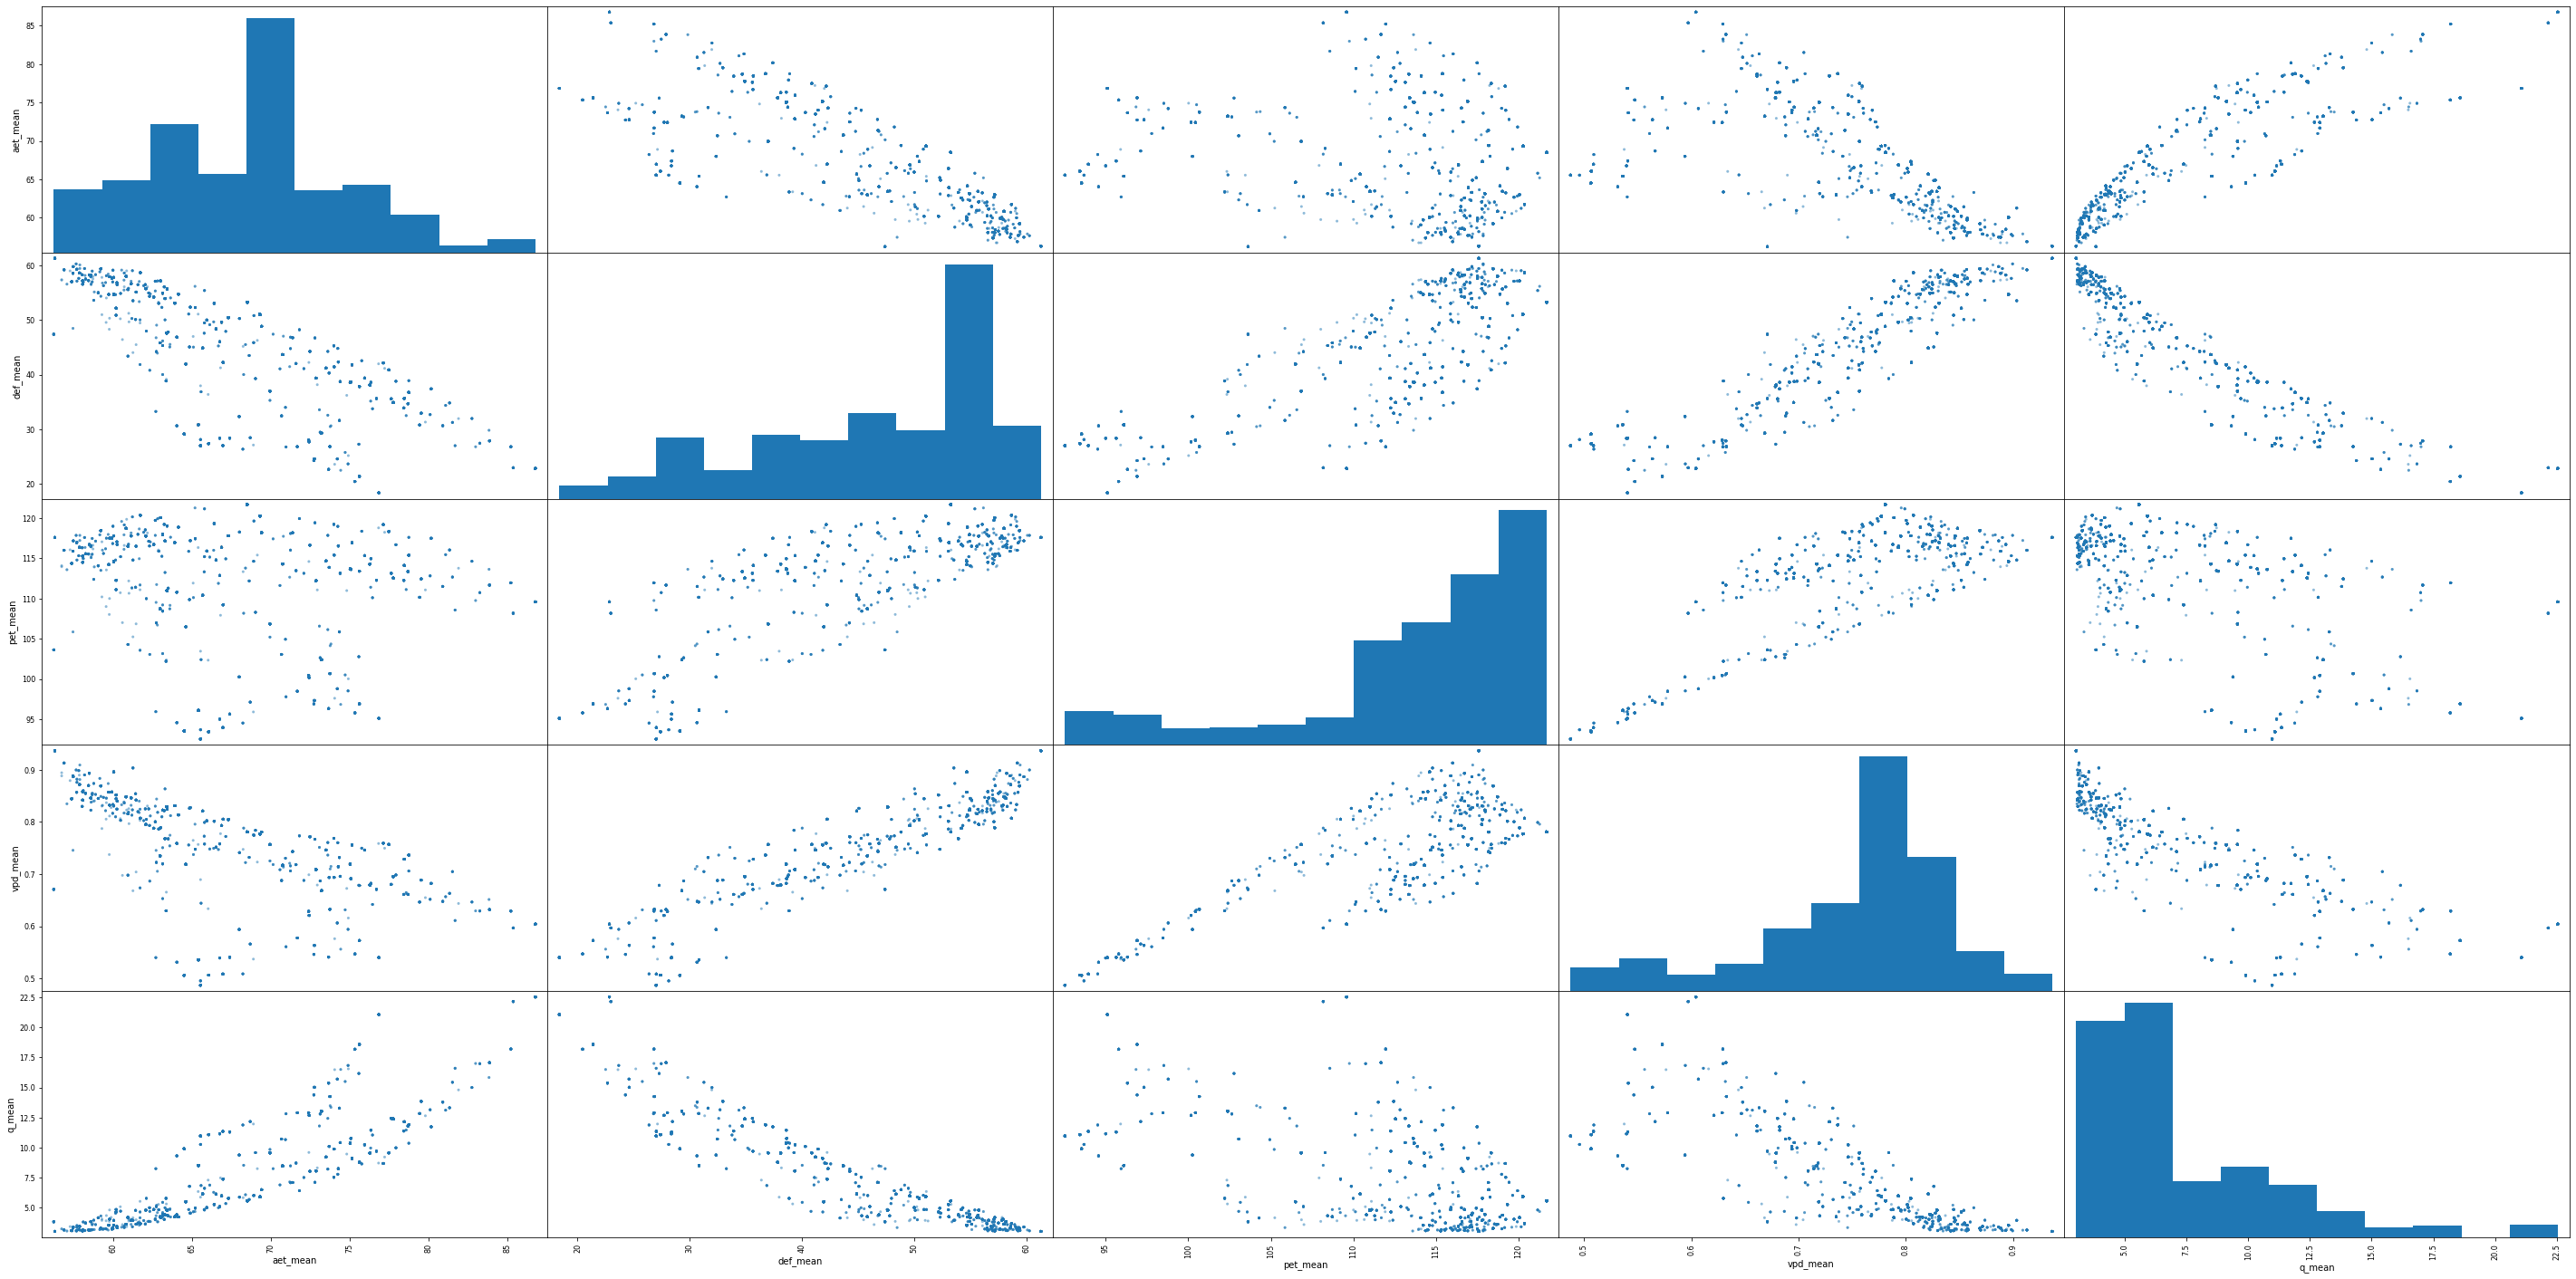

In [109]:
fig = pd.plotting.scatter_matrix(df4[['aet_mean','def_mean','pet_mean','vpd_mean','q_mean']])
plt.rcParams['figure.figsize'] = [50, 25]

In [110]:
df5 = df4
x_data = ['ppt_mean','srad_mean','tmax_mean','tmin_mean','vap_mean','ws_mean','aet_mean','def_mean','pet_mean','vpd_mean','q_mean']
for xi in (x_data):
    new_name = "normalized_" + xi
    new_col = preprocessing.normalize([df5[xi]]).T
    df5[new_name] = new_col
df5 = df5.drop(['ppt_mean','srad_mean','tmax_mean','tmin_mean','vap_mean','ws_mean','aet_mean','def_mean','pet_mean','vpd_mean','q_mean'],1)
df5.head()

,occurrenceStatus,normalized_ppt_mean,normalized_srad_mean,normalized_tmax_mean,normalized_tmin_mean,normalized_vap_mean,normalized_ws_mean,normalized_aet_mean,normalized_def_mean,normalized_pet_mean,normalized_vpd_mean,normalized_q_mean
0,0,0.013023,0.013477,0.010380,0.008058,0.010088,0.012405,0.012840,0.008715,0.011250,0.009463,0.013998
1,0,0.012496,0.013287,0.013917,0.014849,0.014225,0.014817,0.012915,0.015658,0.014183,0.014106,0.007917
2,0,0.017151,0.013311,0.013294,0.014386,0.013966,0.013461,0.016000,0.008838,0.013190,0.012444,0.025367
3,0,0.011218,0.013485,0.013908,0.013345,0.013509,0.012356,0.011773,0.016101,0.013678,0.014415,0.005534
4,0,0.014923,0.013330,0.013624,0.014854,0.014188,0.013989,0.014750,0.011821,0.013687,0.013350,0.014985


In [111]:
full_model3 = LogisticRegression()
# Separate the predictor variables from the response
X3 = df5.drop(['occurrenceStatus'], 1)
y3 = df5.occurrenceStatus.astype(int)
#y_test = df2.occurrenceStatus.astype(int)[:4464]
# Fit model
full_model2.fit(X3, y3)

LogisticRegression()

In [112]:
predictions3 = full_model2.predict(X3)
# a K-fold shuffle test without normalizing
# prepare the cross-validation procedure
cv3 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(full_model2, X3, y3, scoring='accuracy', cv=cv3, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print(f"F1 Score: {np.mean(f1_score(y3, predictions3))}")
print(f"Accuracy: {np.mean(accuracy_score(y3, predictions3))}")

Accuracy: 0.675 (0.025)
F1 Score: 0.7205882352941176
Accuracy: 0.6799283154121863


## try to test with other area